## Sustitución usando una etiqueta adicional en variables categóricas

Este es el método de sustitución más usado con variables categóricas. Este método considera los valores faltantes como una categoría o etiqueta adicional de la variable, por lo tanto todas las observaciones con valores ausentes son agrupadas con esta nueva etiqueta 'faltante' o 'missing' en inglés.

En esencia, es equivalente a la sustitución por valores arbitrarios en variables numéricas.

Una ventaja de esta técnica es que no asume nada sobre los datos ausentes y es apropiada cuando el número de valores faltantes es alto.


### Ventajas

- Fácil de implementar
- Forma rápida de obtener conjuntos completos de datos
- Puede ser integrado en producción (durante el despliegue del modelo)
- Captura la importancia de la 'ausencia' (si existe)
- No asume nada acerca de los valores ausentes


### Limitaciones

- Si el número de NA es bajo, crear una categoría adicional puede causar sobre-ajustes en los árboles de decisión 

Este es un método bastante utilizado en competencias de ciencia de datos y organizaciones. Por ejemplo, mira la solución ganadora de la competencia KDD 2009 : "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

### En este demo:

Vamos a aprender cómo reemplazar datos faltantes con la cadena de caracteres ‘Missing’ usando pandas y los datos Ames House Price 

- Para bajar los datos, por favor referirse a la clase en **Datasets** en la  **Sección 1** del curso.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### House Prices dataset

In [2]:
# carguemos los datos con unas columnas

# estas son las columnas categóricas y la variable target SalePrice (precio de venta)
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

BsmtQual FireplaceQu  SalePrice
0       Gd         NaN     208500
1       Gd          TA     181500
2       Gd          TA     223500
3       TA          Gd     140000
4       Gd          TA     250000

In [3]:
# evaluemos el porcentaje de valores nulos por cada una de las variables

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

Cuando reemplazamos los valores nulos NA en variables categóricas por una etiqueta 'Missing', en principio no hay diferencia si hacemos la sustitución antes o después de separar los datos en sets de entrenamiento y prueba.


Sin embargo, no recomendamos esta práctica. Más adelante veremos en los notebooks que es mejor adherirse a la premisa de separar el set de datos original en sets de entrenamiento y prueba al comienzo de la construcción del modelo de machine learning. Por lo tanto seguiremos con esta práctica en este demo.


In [4]:
# separar datos en sets entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['SalePrice'], # target
    test_size=0.3, # porcentaje de obs en test set
    random_state=0) # semilla para reproducibilidad

X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [5]:
# % de valores ausentes
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Número de casas')

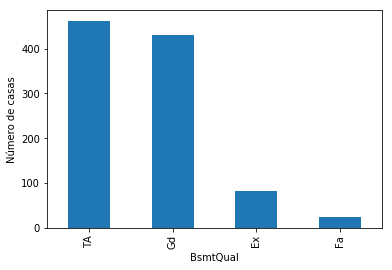

In [6]:
# exploremos el número de observaciones por categoría en BsmtQual

# usamos esta línea de código en la sección 3: características de la  variable

# value_counts() cuenta el número de casas que muestra cada una de las etiquetas
# en las variables indicadas aquí

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Número de casas')

In [7]:
# reemplacemos NA en los sets de prueba y entrenamiento

# usemos el método fillna() de pandas

# con el argumento inplace=True, indicándole a pandas
# que queremos reemplazar los valores en los dataframes originales

X_train['BsmtQual'].fillna('Missing', inplace=True)
X_test['BsmtQual'].fillna('Missing', inplace=True)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Text(0, 0.5, 'Number of houses')

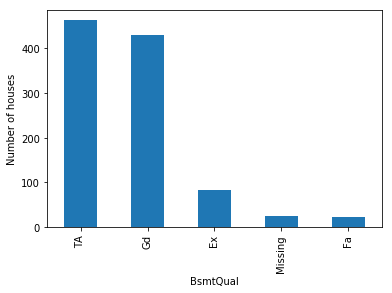

In [8]:
# evaluemos el número de casas por categoría en la variables que acabamos de sustituir

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

Podemos ver la nueva categoria: **Missing**

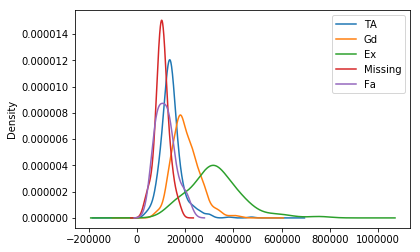

In [9]:
# grafiquemos la distribución del target (SalePrice -precio de venta)
# para las casas que muestran las diferentes categorías en la variable BsmtQual

fig = plt.figure()
ax = fig.add_subplot(111)

# gráfica por categoría
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)

# leyenda
lines, labels = ax.get_legend_handles_labels()
labels = ['TA', 'Gd', 'Ex', 'Missing', 'Fa']
ax.legend(lines, labels, loc='best')

Como podemos ver, las casas que muestran diferentes etiquetas para la variable BsmtQual, tienen también, en promedio, diferentes precios finales de venta. Por ejemplo casas con la categoría Ex (de excelente) suelen tener mayor precio que casas con la categoría Fa (de fair en inglés, razonable). Vemos que las casas que no tenían etiqueta, y ahora están agrupadas con **Missing**, tienen un precio de venta relativamente alto.


#### FirePlaceQu

In [10]:
# determinemos el % de valores faltantes otra vez

X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

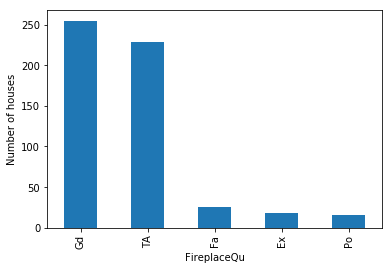

In [11]:
# veamos el número de casas por categoría para esta variable

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [12]:
# reemplacemos NA en los segmentos de prueba y entrenamiento
# con una nueva categoría 'Missing'

X_train['FireplaceQu'].fillna('Missing', inplace=True)
X_test['FireplaceQu'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Número de casas')

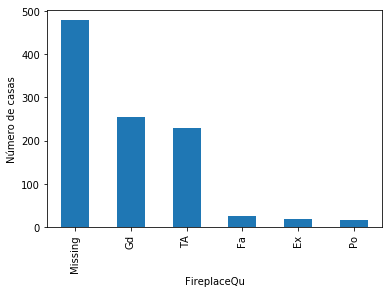

In [13]:
# evaluemos el efecto de este cambio en la distribución de 
# la variable sustituida

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Número de casas')

Vemos la categoría adicional para los valores ausentes: Missing

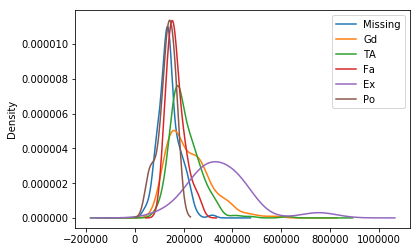

In [14]:
# grafiquemos la distribución del target (SalePrice - precio de venta)
# para diferentes categorías de la variable FireplaceQu.

fig = plt.figure()
ax = fig.add_subplot(111)

# una gráfica por categoría
X_train[X_train['FireplaceQu']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Po']['SalePrice'].plot(kind='kde', ax=ax)

# leyendas
lines, labels = ax.get_legend_handles_labels()
labels = ['Missing','Gd', 'TA', 'Fa', 'Ex', 'Po']
ax.legend(lines, labels, loc='best')

Observemos nuevamente las casas y las diferentes categorías para la variable FireplaceQu. Podemos ver que las casas tienen diferentes distribuciones para el target SalePrice: las casas con la etiqueta Ex son las más costosas así como las de la categoría Missing, mientras que casas con la categoría Fa son las más baratas.

**Esto es todo por este demo. En las siguientes secciones estudiaremos como automatizar este proceso usando Scikit-learn y Feature-engine como parte de una pipeline de machine learning.**


In [15]:
# BONUS: en caso que necesites graficar las diferentes distribuciones
# esta es una forma de hacerlo de forma general


def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()
        

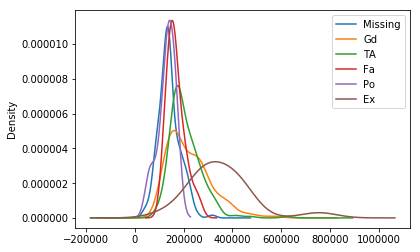

In [16]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

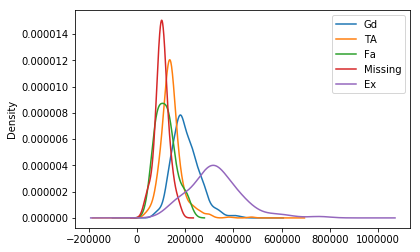

In [17]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')